In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load dataset
titanic = pd.read_csv('Titanic-Dataset.csv') 
# Initial data inspection
titanic.info()
titanic.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:


# Data cleaning
# Handle missing values
titanic.fillna(titanic['Age'].median(), inplace=True)
titanic.fillna(titanic['Embarked'].mode()[0], inplace=True)
titanic.fillna(titanic['Fare'].median(), inplace=True)



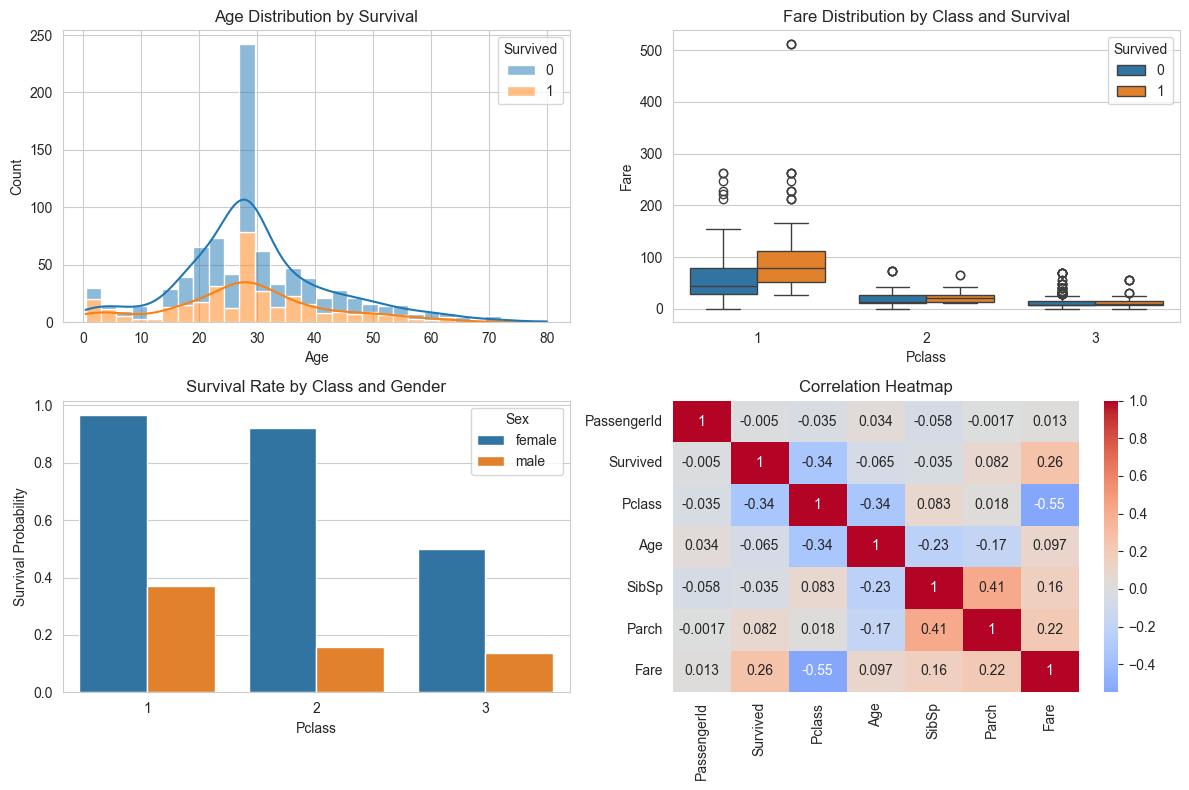

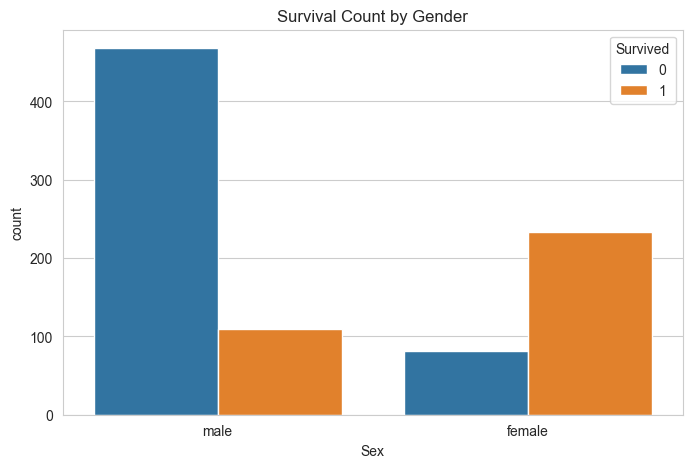

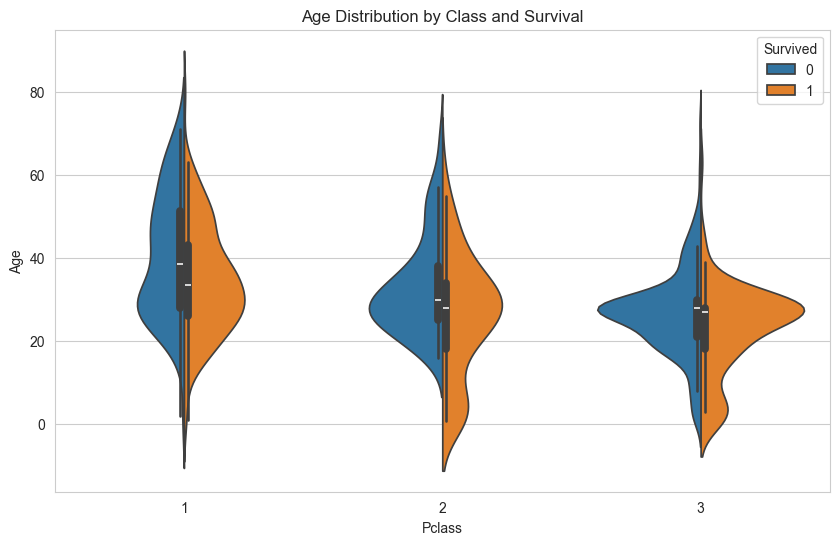

In [11]:
# Set style for visualizations
sns.set_style('whitegrid')
plt.figure(figsize=(12, 8))

# 1. Distribution of continuous variables
# Age distribution by survival
plt.subplot(2, 2, 1)
sns.histplot(data=titanic, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Age Distribution by Survival')

# Fare distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=titanic, x='Pclass', y='Fare', hue='Survived')
plt.title('Fare Distribution by Class and Survival')

# 2. Survival rates across categories
plt.subplot(2, 2, 3)
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', errorbar=None)
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Probability')

# 3. Correlation heatmap
plt.subplot(2, 2, 4)
corr = titanic.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')

plt.tight_layout()
plt.show()

# Additional insightful visualizations
# Survival count by gender
plt.figure(figsize=(8, 5))
sns.countplot(data=titanic, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

# Age distribution across classes
plt.figure(figsize=(10, 6))
sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Survived', split=True)
plt.title('Age Distribution by Class and Survival')
plt.show()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5312\3587695048.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_survival, x='Sex', y='Survived', palette='viridis')


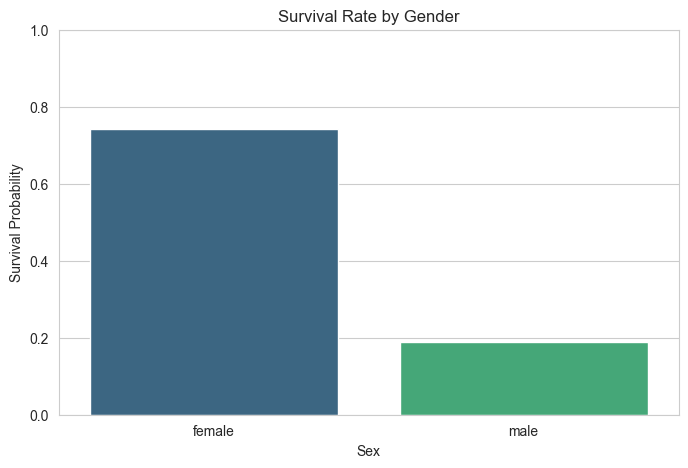

Gender difference p-value: 0.0000


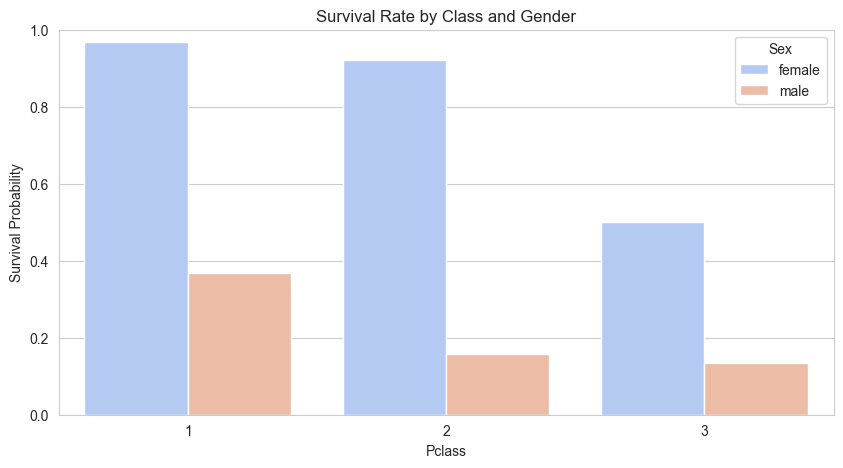

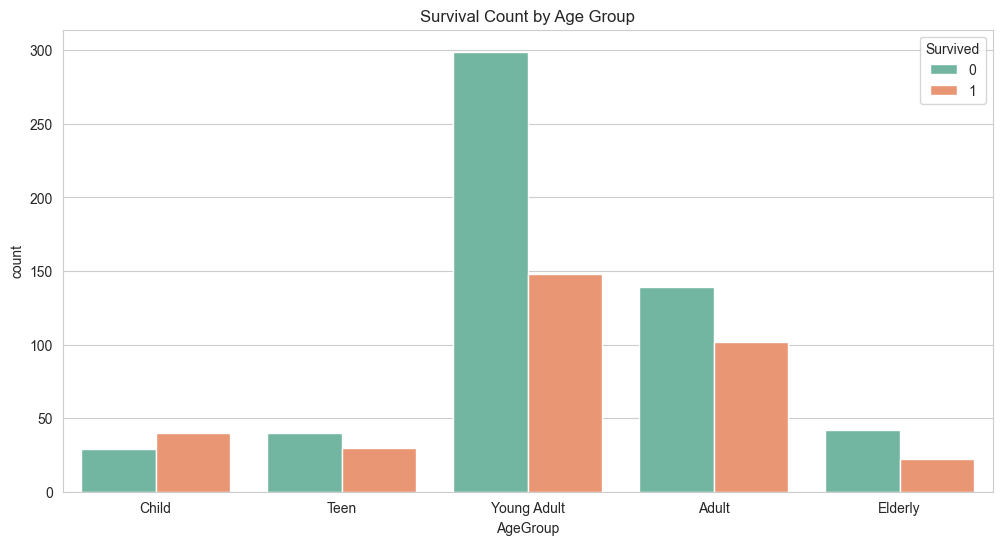

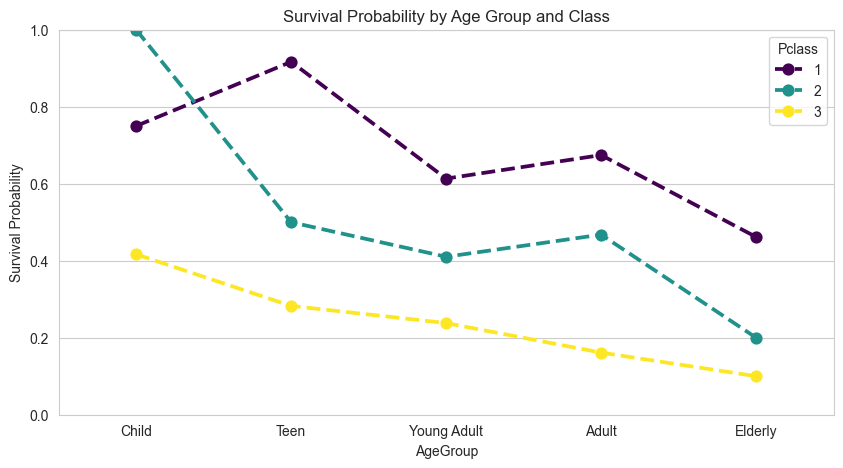

In [14]:
# 1. Survival Rate by Gender
gender_survival = titanic.groupby('Sex')['Survived'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(data=gender_survival, x='Sex', y='Survived', palette='viridis')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Probability')
plt.ylim(0, 1)
plt.show()

# Statistical test for gender difference
from scipy.stats import chi2_contingency
gender_table = pd.crosstab(titanic['Sex'], titanic['Survived'])
chi2, p, _, _ = chi2_contingency(gender_table)
print(f"Gender difference p-value: {p:.4f}")

# 2. Survival Rate by Passenger Class
plt.figure(figsize=(10, 5))
sns.barplot(data=titanic, x='Pclass', y='Survived', hue='Sex', errorbar=None, palette='coolwarm')
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Probability')
plt.ylim(0, 1)
plt.show()

# 3. Survival Rate by Age Group
titanic['AgeGroup'] = pd.cut(titanic['Age'], 
                            bins=[0, 12, 18, 30, 50, 80],
                            labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Elderly'])

plt.figure(figsize=(12, 6))
sns.countplot(data=titanic, x='AgeGroup', hue='Survived', palette='Set2')
plt.title('Survival Count by Age Group')
plt.show()

# Survival probability by age group
plt.figure(figsize=(10, 5))
sns.pointplot(data=titanic, x='AgeGroup', y='Survived', hue='Pclass', 
              palette='viridis', errorbar=None, linestyles='--')
plt.title('Survival Probability by Age Group and Class')
plt.ylabel('Survival Probability')
plt.ylim(0, 1)
plt.show()